In [1]:
!pip install pyts

In [2]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df1 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject1.csv')
df2 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject2.csv')
df3 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject3.csv')
df4 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject4.csv')
df5 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject5.csv')
df6 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject6.csv')
df7 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject7.csv')
df8 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject8.csv')
df9 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject9.csv')
df10 = pd.read_csv('C:\\Users\\sjkjy\\OneDrive\\바탕 화면\\나의모든것\\연구실인턴\\대산공+한디정경진대회\\mHealth\\subject10.csv')

In [4]:
df1 = df1[df1['Unnamed: 0'] != 3050]
df1 = df1.drop(columns=['Unnamed: 0'], axis=1)
df2 = df2[df2['Unnamed: 0'] != 3050]
df2 = df2.drop(columns=['Unnamed: 0'], axis=1)
df3 = df3[df3['Unnamed: 0'] != 3050]
df3 = df3.drop(columns=['Unnamed: 0'], axis=1)
df4 = df4[df4['Unnamed: 0'] != 3050]
df4 = df4.drop(columns=['Unnamed: 0'], axis=1)
df5 = df5[df5['Unnamed: 0'] != 3050]
df5 = df5.drop(columns=['Unnamed: 0'], axis=1)
df6 = df6[df6['Unnamed: 0'] != 3050]
df6 = df6.drop(columns=['Unnamed: 0'], axis=1)
df7 = df7[df7['Unnamed: 0'] != 3050]
df7 = df7.drop(columns=['Unnamed: 0'], axis=1)
df8 = df8[df8['Unnamed: 0'] != 3050]
df8 = df8.drop(columns=['Unnamed: 0'], axis=1)
df9 = df9[df9['Unnamed: 0'] != 3050]
df9 = df9.drop(columns=['Unnamed: 0'], axis=1)
df10 = df10[df10['Unnamed: 0'] != 3050]
df10 = df10.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
def pro(df,i):
    label=df['label']
    df.drop(['label'],axis=1,inplace=True)
    return df,label

In [6]:
df1,label1=pro(df1,1)
df2,label2=pro(df2,2)
df3,label3=pro(df3,3)
df4,label4=pro(df4,4)
df5,label5=pro(df5,5)
df6,label6=pro(df6,6)
df7,label7=pro(df7,7)
df8,label8=pro(df8,8)
df9,label9=pro(df9,9)
df10,label10=pro(df10,10)

In [7]:
testx = np.concatenate((df8,df9,df10),axis=0)
testy = np.concatenate((label8,label9,label10),axis=0)
trainx = np.concatenate((df1,df2,df3,df4,df5,df6,df7),axis=0) 
trainy = np.concatenate((label1,label2,label3,label4,label5,label6,label7),axis=0) 

In [8]:
def make_data(df):
    scaler = MinMaxScaler()
    df=pd.DataFrame(scaler.fit_transform(df[:]))
    return df
train = make_data(trainx)
test = make_data(testx)

In [9]:
#128100,1,9
#128100,6
#54900,1,9
#54900,6

#7352,128,9
#7352,6

In [10]:
trainy = pd.DataFrame(pd.get_dummies(trainy))
testy = pd.DataFrame(pd.get_dummies(testy))

In [11]:
# train, trainy, test, testy
train = np.expand_dims(train, axis=-1)
test = np.expand_dims(test, axis=-1)

In [12]:
model = keras.Sequential(
    [
        layers.Conv1D(16, 3, strides=1),
        layers.MaxPool1D(pool_size=2,strides=2),
        layers.Conv1D(32, 3, strides=1),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu"),
        layers.Dense(6, activation='softmax'),
    ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(
    train, 
    trainy, 
    batch_size=16,
    epochs=15, 
    validation_data=(test,testy)
)

Epoch 1/15
8007/8007 [==============================] - 29s 3ms/step - loss: 0.1809 - acc: 0.9387 - val_loss: 0.0381 - val_acc: 0.9883
Epoch 2/15
8007/8007 [==============================] - 30s 4ms/step - loss: 0.0537 - acc: 0.9834 - val_loss: 0.0212 - val_acc: 0.9934
Epoch 3/15
8007/8007 [==============================] - 28s 4ms/step - loss: 0.0375 - acc: 0.9884 - val_loss: 0.0252 - val_acc: 0.9935
Epoch 4/15
8007/8007 [==============================] - 29s 4ms/step - loss: 0.0324 - acc: 0.9903 - val_loss: 0.0143 - val_acc: 0.9962
Epoch 5/15
8007/8007 [==============================] - 31s 4ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0162 - val_acc: 0.9949
Epoch 6/15
8007/8007 [==============================] - 29s 4ms/step - loss: 0.0249 - acc: 0.9925 - val_loss: 0.0134 - val_acc: 0.9960
Epoch 7/15
3810/8007 [=============>................] - ETA: 12s - loss: 0.0237 - acc: 0.9927

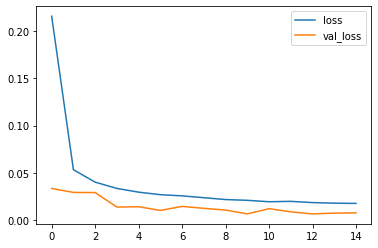

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

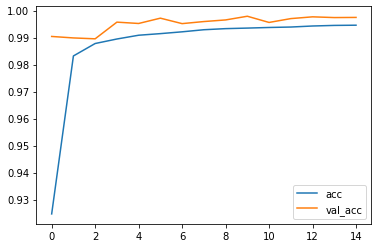

In [21]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()